# Datenherkunft
## Dataset 1: owid-co2-data.csv
Dieses Dataset stammt von der Webseite "Our World in Data" und basiert auf Daten des Global Carbon Project. Bei dem Original-Dataset handelt sich um das "Global Carbon Budget", welches Daten über den CO2 ausstoß diverser Länder und Kontinente enthält, aufgeteilt nach namen. Für diese Analyse habe ich mich auf Kontinentaleuropa (ohne Rusland und die Türkei) beschränkt. Die restlichen Daten habe ich manuel entfernt. Hierbei habe ich nicht die bereits im Dataset vorhandenen Zeilen für Europ genutzt, da mir nicht bekannt ist ob diese die Türkei und Russland enthalten. Außerdem enthalten diese bestimmte Spalten wie beispielsweise BiP nicht. Dazu exkludiere ich Daten vor 1970, da die restlichen Daten dort tendenziell deutlich vollständiger werden. Zudem wurden folgende Länder wegen stark unvollständigen Daten exkludiert: Färöer-Inseln, Gönland, Isle of Man, Bailiwick of Jersey, Monaco, San Marino, Gibralta und der Vatikanstadt. 
<details>
<summary>Zitierung ansehen</summary>
Hannah Ritchie (2022) - “CO₂ emissions dataset: our sources and methods” herausgegeben online auf OurWorldInData.org. Von: 'https://ourworldindata.org/co2-dataset-sources' [Online]

Andrew, R. M., & Peters, G. P. (2023). The Global Carbon Project's fossil CO2 emissions dataset (2023v36) [Datensatz]. Zenodo. https://doi.org/10.5281/zenodo.10177738

Die Datein aus dem Global Carbon Budget können hier abgerufen werden: https://globalcarbonbudget.org/carbonbudget/

Die grundlegende Studie "Global Carbon Budget 2023":
Friedlingstein, P., O'Sullivan, M., Jones, M. W., Andrew, R. M., Bakker, D. C. E., Hauck, J., Landschützer, P., Le Quéré, C., Luijkx, I. T., Peters, G. P., Peters, W., Pongratz, J., Schwingshackl, C., Sitch, S., Canadell, J. G., Ciais, P., Jackson, R. B., Alin, S. R., Anthoni, P., Barbero, L., Bates, N. R., Becker, M., Bellouin, N., Decharme, B., Bopp, L., Brasika, I. B. M., Cadule, P., Chamberlain, M. A., Chandra, N., Chau, T.-T.-T., Chevallier, F., Chini, L. P., Cronin, M., Dou, X., Enyo, K., Evans, W., Falk, S., Feely, R. A., Feng, L., Ford, D. J., Gasser, T., Ghattas, J., Gkritzalis, T., Grassi, G., Gregor, L., Gruber, N., Gürses, Ö., Harris, I., Hefner, M., Heinke, J., Houghton, R. A., Hurtt, G. C., Iida, Y., Ilyina, T., Jacobson, A. R., Jain, A., Jarníková, T., Jersild, A., Jiang, F., Jin, Z., Joos, F., Kato, E., Keeling, R. F., Kennedy, D., Klein Goldewijk, K., Knauer, J., Korsbakken, J. I., Körtzinger, A., Lan, X., Lefèvre, N., Li, H., Liu, J., Liu, Z., Ma, L., Marland, G., Mayot, N., McGuire, P. C., McKinley, G. A., Meyer, G., Morgan, E. J., Munro, D. R., Nakaoka, S.-I., Niwa, Y., O'Brien, K. M., Olsen, A., Omar, A. M., Ono, T., Paulsen, M., Pierrot, D., Pocock, K., Poulter, B., Powis, C. M., Rehder, G., Resplandy, L., Robertson, E., Rödenbeck, C., Rosan, T. M., Schwinger, J., Séférian, R., Smallman, T. L., Smith, S. M., Sospedra-Alfonso, R., Sun, Q., Sutton, A. J., Sweeney, C., Takao, S., Tans, P. P., Tian, H., Tilbrook, B., Tsujino, H., Tubiello, F., van der Werf, G. R., van Ooijen, E., Wanninkhof, R., Watanabe, M., Wimart-Rousseau, C., Yang, D., Yang, X., Yuan, W., Yue, X., Zaehle, S., Zeng, J., and Zheng, B.: Global Carbon Budget 2023, Earth Syst. Sci. Data, 15, 5301-5369, https://doi.org/10.5194/essd-15-5301-2023, 2023.
</details>

### Spalten
- Alle Spalteninfos lassen sich in der Datei owid-co2-codebook.csv ansehen
<br><br>
Die wichtigsten Spalten, welche ich benutzt habe waren:

## Dataset 2: aravg.mon.land.30N.60N.v6.0.0.202407.asc
Dieses Dataset stammt von der Webseite des National Centers for Envriotmental Information, einer Unterorganisation der US-Amerikanischen National Oceanic and Atmospheric Administration, zu deutsch Bundesbehörde für Ozeane und die Atmosphere. Es beinhaltet Temperaturnaomaliedaten vom 30. Breitengrad Nord bis zum 60. Breitengrad Nord. Dieser Bereich geht cirka von Cairo bis Stockholm und beinhaltet damit große Teile von Europa, Nordamerika, Nordasien, Nordafrike und dem Mitleren Osten. Die Temperaturbasis wird dabei aus der Durschnittstemperatur von 1971 bis 2000 berechnet. Die Daten wurden bis 2022 limitiert, da dort das andere Dataset endet.
### Spalten
Folgende Spalten sind in dem Dataset vorhanden:
1. Jahr
2. Monat
3. Temperaturanomalie (K)

Die restlichen Spalten habe ich entfernt, da alle Felder in ihnen bei -999.000000 lagen.








In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd

# Data Cleaning
Zum beginn habe ich das erste Dataset eingelesen und eine Liste von ISO-Ländercodes von Kontinentaleuropa erstellt. Einige Länder habe ich aufgrund von sehr unvollständigen Daten entfernt. Dazu habe ich die Türkei und Russland nicht einbezogen, da diese Größtenteils in Asien liegen. Dann habe ich alle Daten die nicht zu Kontinentaleuropa gehören entfernt:

In [143]:
# Daten einlesen
co_data = pd.read_csv("data\owid-co2-data.csv")
temp_data = pd.read_csv("data/aravg.mon.land.30N.60N.v6.0.0.202407.asc", sep="\s+", header=None)

# Daten von vor 1850 entfernen
co_data = co_data[co_data['year'] >= 1970]
co_data = co_data[co_data['year'] <= 2021]

temp_data = temp_data[temp_data[0] >= 1970]
temp_data = temp_data[temp_data[0] <= 2021]

# Liste von Europäischen 3-Zeichen ISO-Ländercodes, abgesehen von Russland, Türkei,Färöer-Inseln, Gönland, Isle of Man, Bailiwick of Jersey, Monaco, San Marino, Gibralta und der Vatikanstadt
eu_countries = ['ALB', 'AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'LVA', 'LIE', 'LTU', 'LUX', 'MKD', 'MLT', 'MDA', 'MNE', 'NLD', 'NOR', 'POL', 'PRT', 'ROU', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE' , 'UKR', 'GBR']

# co_data nach Ländercode filtern
co_data = co_data[co_data['iso_code'].isin(eu_countries)]


Daraufhin habe ich die fehlende Werte entweder durch den Spalten Durschnitt im Bezug auf die entsprechenden Länder oder durch den nächten verfügbaren Wert ersetzt

In [144]:
# NaNs in 'co2' durch den Durchschnitt der Spalte in dem Land ersetzen
co_data['co2'] = co_data.groupby('iso_code')['co2'].transform(lambda x: x.fillna(x.mean()))

# NaNs in Population und GDP durch den wert des folgejahres ersetzen
co_data['population'] = co_data.groupby('iso_code')['population'].transform(lambda x: x.fillna(method='bfill'))
co_data['gdp'] = co_data.groupby('iso_code')['gdp'].transform(lambda x: x.fillna(method='bfill'))

C:\Users\KrajinovicR\AppData\Local\Temp\ipykernel_13892\3325603288.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  co_data['population'] = co_data.groupby('iso_code')['population'].transform(lambda x: x.fillna(method='bfill'))
C:\Users\KrajinovicR\AppData\Local\Temp\ipykernel_13892\3325603288.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  co_data['gdp'] = co_data.groupby('iso_code')['gdp'].transform(lambda x: x.fillna(method='bfill'))


# Explorative Datenanalyse
Zu beginn der EDA habe ich mir die Korrelation zwischen CO2 und BiP, sowie die Korrelation zwischen CO2 und Einwohnerzahl angeschaut, welche respektive bei 0.78 und 0.86 liegen:

<Axes: >

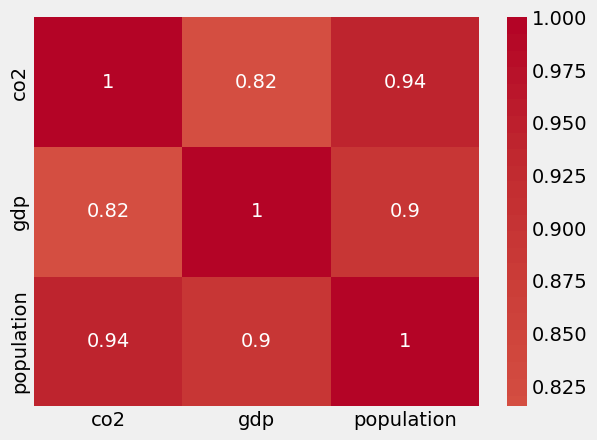

In [145]:
style.use('fivethirtyeight')

# Heatmap von Co2, BiP, Bevölkerung und Temperatur
sns.heatmap(co_data[['co2', 'gdp', 'population']].corr(), annot=True, cmap='coolwarm', center=0)

Als Nächstes habe ich mir die Temperaturanomalie über die Jahre angeschaut:

Text(0, 0.5, 'Temperaturabweichung')

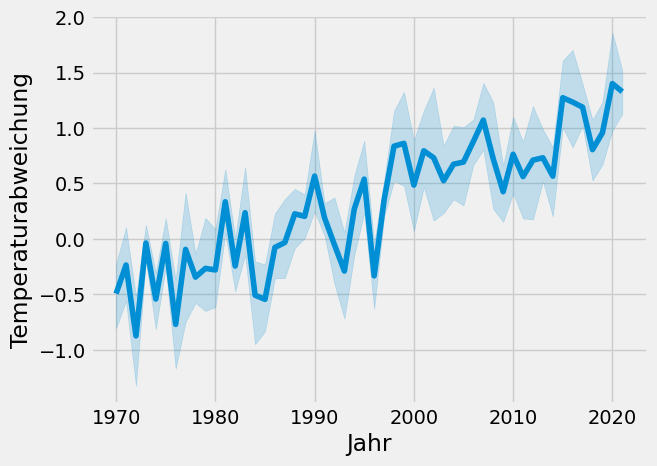

In [146]:
# Lineplot von tempreture Data:
sns.lineplot(data=temp_data,  x=0, y=2)
plt.xlabel('Jahr')
plt.ylabel('Temperaturabweichung')

# Feature Engeneering 1
Um eine Korrelation zwischen CO2 und Temperatur herauszufinden, habe ich einen Gesamt-CO2 Wert in millionen Tonnen hinzugefügt:

In [147]:
# Neue Spalte für Gesamt-CO2-Emissionen aller Europäischen Länder
co_data['total_co2'] = co_data.groupby('iso_code')['co2'].transform(lambda x: x.cumsum())

           co2  total_co2  year iso_code
739      3.739      3.739  1970      ALB
740      4.348      8.087  1971      ALB
741      5.638     13.725  1972      ALB
742      5.286     19.011  1973      ALB
743      4.342     23.353  1974      ALB
...        ...        ...   ...      ...
44907  387.367  26895.800  2017      GBR
44908  379.730  27275.530  2018      GBR
44909  364.753  27640.283  2019      GBR
44910  326.263  27966.546  2020      GBR
44911  347.465  28314.011  2021      GBR

[2184 rows x 4 columns]


# EDA 2
Nachdem ich die Spalte für den Gesamten CO2-Ausstoß erstellt habe, möchte ich herrausfinden ob es eine Korrelation mit der Temperaturanomalie gibt:

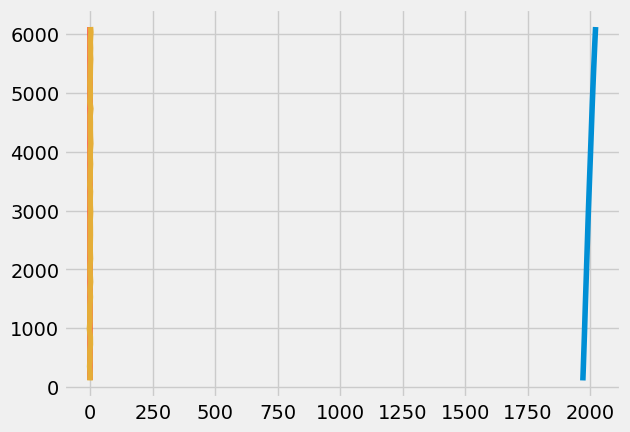

In [148]:
# Plot zu total_co2 und temp_data
plt.plot(temp_data[temp_data[1] == 1], co_data.groupby("year")['total_co2'].mean(), label='CO2 Emissionen')